In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Load the data 
data_path = '../src/data/telecom_users_data_source.csv' 
df = pd.read_csv(data_path)

In [6]:
# Check the shape of the data 
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (150001, 55)


In [7]:
# Get a summary of the data 
print("\nSummary of the DataFrame:") 
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object

In [9]:
# Inspect the data 
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [11]:
# Identify columns with unique values
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]

# Display the columns with unique values
print("Columns with unique values:")
print(unique_columns)

Columns with unique values:
[]


In [12]:
# Check for duplicate values in 'Bearer Id' 
duplicate_bearer_ids = df['Bearer Id'].duplicated().sum() 
print(f"Number of duplicate 'Bearer Id' values except its frist row: {duplicate_bearer_ids}")

# Identify duplicate rows based on 'Bearer Id'
duplicate_rows = df[df.duplicated(subset='Bearer Id', keep=False)]
print(f"Number of duplicate 'Bearer Id' values: {duplicate_rows.shape[0]}")

# Check for duplicate values in 'MSISDN/Number'
duplicate_msisdn = df['MSISDN/Number'].duplicated().sum()
print(f"Number of duplicate 'MSISDN/Number' values except its frist row: {duplicate_msisdn}")

# Identify duplicate rows based on 'MSISDN/Number'
duplicate_rows = df[df.duplicated(subset='MSISDN/Number', keep=False)]
print(f"Number of duplicate 'MSISDN/Number' rows: {duplicate_rows.shape[0]}")

# Check for duplicate values in 'IMEI'
duplicate_imei = df['IMEI'].duplicated().sum()
print(f"Number of duplicate 'IMEI' values except its frist row: {duplicate_imei}")

# Identify duplicate rows based on 'IMEI'
duplicate_rows_imei = df[df.duplicated(subset='IMEI', keep=False)]
print(f"Number of duplicate 'IMEI' rows: {duplicate_rows_imei.shape[0]}")

Number of duplicate 'Bearer Id' values except its frist row: 15292
Number of duplicate 'Bearer Id' values: 27041
Number of duplicate 'MSISDN/Number' values except its frist row: 43144
Number of duplicate 'MSISDN/Number' rows: 72270
Number of duplicate 'IMEI' values except its frist row: 42730
Number of duplicate 'IMEI' rows: 71905


#### Handling the missing Values

In [13]:
# Check for missing values 
missing_values = df.isnull().sum() 
missing_values

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Display the columns with their missing value percentages
missing_percentage

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [15]:
# Remove duplicate Bearer Id values 
df = df.drop_duplicates(subset='Bearer Id', keep='first')

In [17]:
# Remove columns with high missing values (more than 50%)
high_missing_cols = [
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 
    'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 
    'Nb of sec with 6250B < Vol UL < 37500B'
]
df.drop(columns=high_missing_cols, inplace=True)

In [20]:
# Remove rows with missing values for specified columns 
remove_missing_cols = [ 
    'Last Location Name','Bearer Id','IMSI','MSISDN/Number','IMEI','Dur. (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Start', 'Start ms', 'End', 'End ms', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B' ] 
df.dropna(subset=remove_missing_cols, inplace=True)

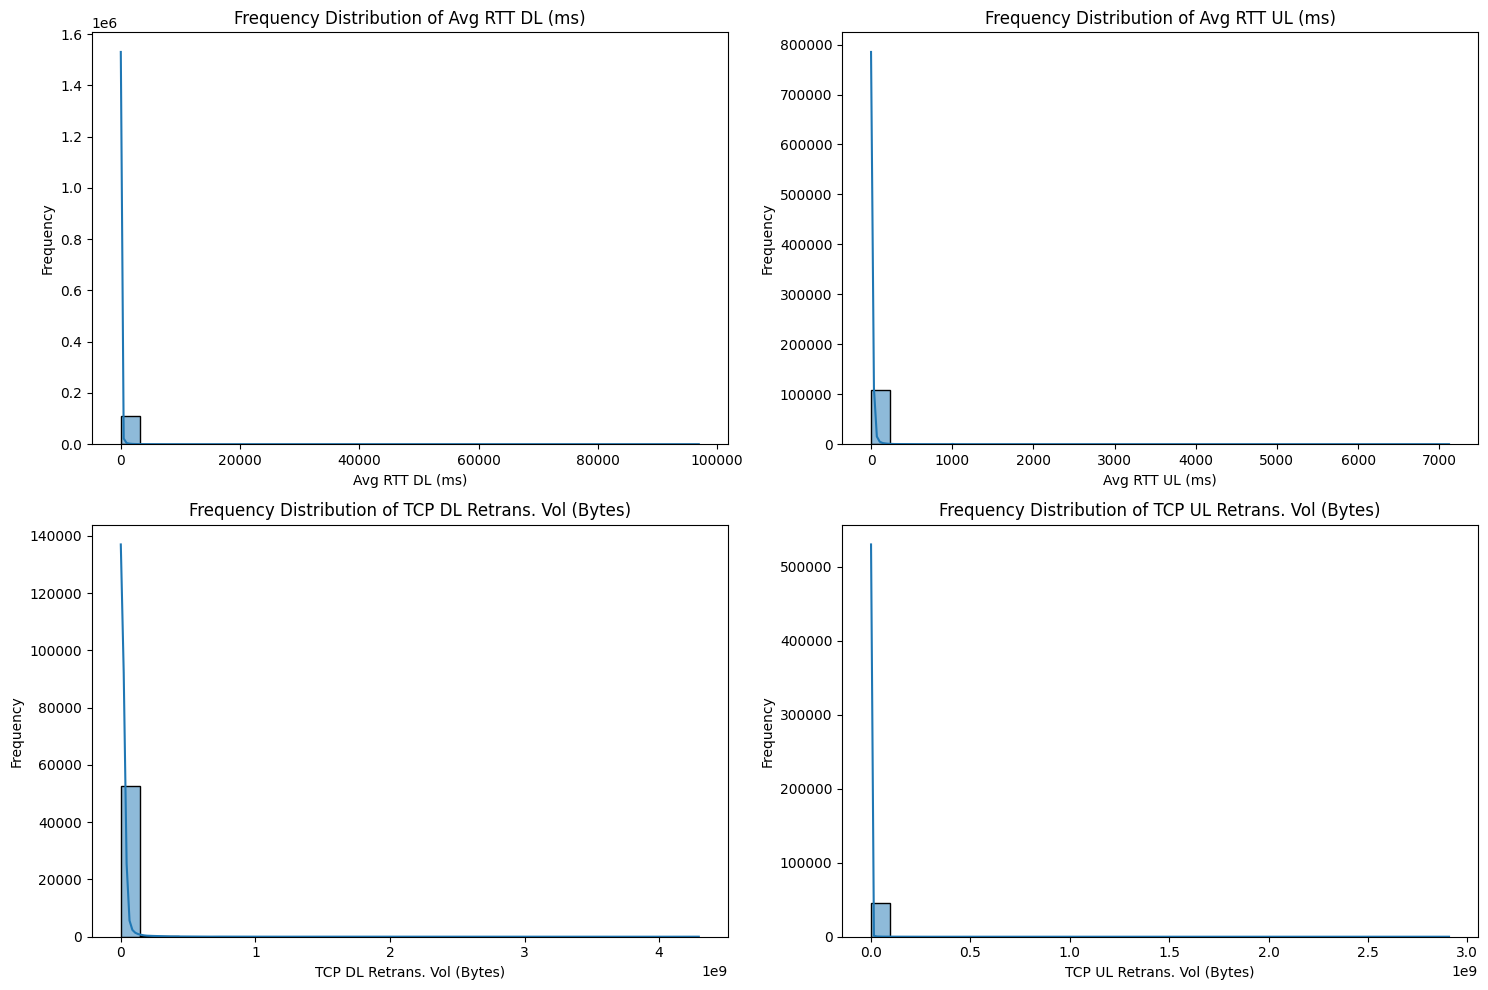

In [22]:
# Plotting the frequency distributions in one figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Avg RTT DL (ms)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Frequency Distribution of Avg RTT DL (ms)')
axes[0, 0].set_xlabel('Avg RTT DL (ms)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['Avg RTT UL (ms)'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Frequency Distribution of Avg RTT UL (ms)')
axes[0, 1].set_xlabel('Avg RTT UL (ms)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['TCP DL Retrans. Vol (Bytes)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Frequency Distribution of TCP DL Retrans. Vol (Bytes)')
axes[1, 0].set_xlabel('TCP DL Retrans. Vol (Bytes)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['TCP UL Retrans. Vol (Bytes)'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Frequency Distribution of TCP UL Retrans. Vol (Bytes)')
axes[1, 1].set_xlabel('TCP UL Retrans. Vol (Bytes)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
# Replace missing values with the mean for the specified columns
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['Avg RTT UL (ms)'] = df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(df['TCP UL Retrans. Vol (Bytes)'].mean())

print("Missing values replaced with the mean for the specified columns.")

Missing values replaced with the mean for the specified columns.


In [24]:
# Mode Imputation for Categorical Columns 
categorical_cols = ['Handset Manufacturer', 'Handset Type'] 
df = df.assign(**{col: df[col].fillna(df[col].mode()[0]) for col in categorical_cols})

In [29]:
# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [27]:
# Save the cleaned data to a CSV file
cleaned_data_path = '../src/data/cleanedTelecomUsersData.csv'
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Cleaned data saved to ../src/data/cleanedTelecomUsersData.csv


In [28]:
# Check the shape of the data 
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (133130, 47)


In [30]:
# Check if there is a value of "missing_MSISDN/Number" in the MSISDN/Number column
missing_value_exists = "missing_MSISDN/Number" in df['MSISDN/Number'].values

if missing_value_exists:
    print("The value 'missing_MSISDN/Number' exists in the MSISDN/Number column.")
else:
    print("The value 'missing_MSISDN/Number' does not exist in the MSISDN/Number column.")

The value 'missing_MSISDN/Number' does not exist in the MSISDN/Number column.
